In [ ]:
import numpy as np
import seaborn as sns
import math

In [ ]:
class Gridworld(object):
    def __init__(self, grid_height,grid_width, start_state, goal_state):
        self.height = grid_height
        self.width = grid_width
        self.start_state = start_state # the start state is a tuple
        self.state = start_state # the current state is a tuple
        self.goal_state = goal_state # the goal state is a list of tuples
        
    def step(self,action):
        # action 0,1,2,3: e,w,n,s
        if self.state in self.goal_state:
            return 0,True
        if action==0 and self.state[1]+1 < self.width:
            self.state = (self.state[0],self.state[1]+1)
        if action==1 and self.state[1]-1 >= 0:
            self.state = (self.state[0],self.state[1]-1)
        if action==2 and self.state[0]-1 >= 0:
            self.state = (self.state[0]-1,self.state[1])
        if action==3 and self.state[0]+1 < self.height:
            self.state = (self.state[0]+1,self.state[1])
        done = False
        if self.state in self.goal_state:
            done = True
        reward = -1.0
        return reward,done
    
    def get_reward(self,state,action):
        if state in self.goal_state:
            return 0.0
        else:
            return -1.0
    def get_next_state(self,state,action):
        if state in self.goal_state:
            return state
        if action==0 and state[1]+1 < self.width:
            return (state[0],state[1]+1)
        if action==1 and state[1]-1 >= 0:
            return (state[0],state[1]-1)
        if action==2 and state[0]-1 >= 0:
            return (state[0]-1,state[1])
        if action==3 and state[0]+1 < self.height:
            return (state[0]+1,state[1])
        return state
    
    def reset(self):
        self.state = self.start_state
        
    def goal_states(self):
        return self.goal_state

In [ ]:
height = width =6
num_episodes = 50000
gamma = 1
alpha=0.1

In [4]:
'''First-visit and Every-visit Monte Carlo + TD'''
Returns_first_visit = {(i,j):[] for i in range(height) for j in range(width)}
Returns_every_visit = {(i,j):[] for i in range(height) for j in range(width)}
td_value_function = {(i,j):0 for i in range(height) for j in range(width)}
for i in range(height):
    for j in range(width):
        Returns_first_visit[(i,j)].append(0)
        Returns_every_visit[(i,j)].append(0)
for i in range(num_episodes):
    start_state = (np.random.randint(0,height),np.random.randint(0,width))
    env = Gridworld(height,width,start_state,[(0,1),(5,5)])
    states = []
    rewards = []
    done = False
    while not done:
        action = np.random.randint(0,4) # uniform policy
        state = env.state
        states.append(env.state)
        reward,done = env.step(action)
        next_state = env.state
        rewards.append(reward)
        td_value_function[state] = td_value_function[state] + alpha*(reward + gamma*td_value_function[next_state] - td_value_function[state])
        if done:
            states.append(env.state)
    for t in range(len(states)):
        if t==len(states):
            G=0
        else:
            G = sum([rewards[t+i]*gamma**i for i in range(len(rewards)-t)])
        Returns_every_visit[states[t]].append(G)
        if states[t] not in states[:t]:
            Returns_first_visit[states[t]].append(G)

average_first_visit = {k: sum(v) / len(v) for k, v in Returns_first_visit.items() }
first_visit_value_function =np.array( [v for k, v in average_first_visit.items() ])
average_every_visit = {k: sum(v) / len(v) for k, v in Returns_every_visit.items()}
every_visit_value_function = np.array([v for k, v in average_every_visit.items() ]).reshape(height,width)


MC_first_visit_value_function:


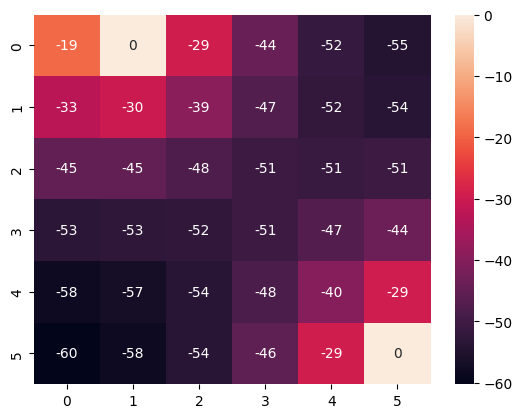

In [5]:
print("MC_first_visit_value_function:")
#print(first_visit_value_function)
ax = sns.heatmap(first_visit_value_function.reshape(height,width),annot=True)


MC_every_visit_value_function:


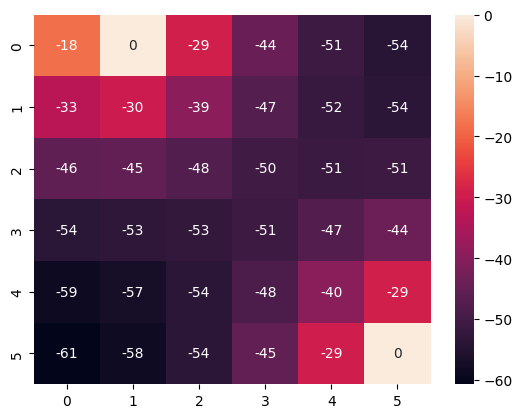

In [6]:
print("MC_every_visit_value_function:")
#print(every_visit_value_function)
ax = sns.heatmap(every_visit_value_function.reshape(height,width),annot=True)
           

TD_value_function:


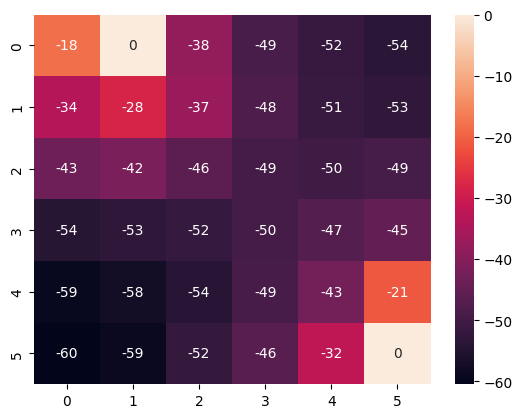

In [7]:
td_value_function = np.array([v for k, v in td_value_function.items() ]).reshape(height,width)
print("TD_value_function:")
#print(td_value_function)
ax = sns.heatmap(td_value_function.reshape(height,width),annot=True)

In [8]:
'''Temporal Differentce'''

alpha=0.05
td_value_function = {(i,j):0 for i in range(height) for j in range(width)}
for i in range(num_episodes):
    start_state = (np.random.randint(0,height),np.random.randint(0,width))
    env = Gridworld(height,width,start_state,[(0,1),(5,5)])
    done = False
    while not done:
        state = env.state
        action = np.random.randint(0,4) # uniform policy
        reward,done = env.step(action)
        next_state = env.state
         # 更新学习率
        #alpha = alpha_min + (alpha_max - alpha_min) * math.exp(-i/ tau)
        td_value_function[state] = td_value_function[state] + alpha*(reward + gamma*td_value_function[next_state] - td_value_function[state])
td_value_function = np.array([v for k, v in td_value_function.items() ]).reshape(height,width)
print("TD_value_function:")
print(td_value_function)
ax = sns.heatmap(td_value_function.reshape(6,6),annot=True)


'\nalpha=0.05\ntd_value_function = {(i,j):0 for i in range(height) for j in range(width)}\nfor i in range(num_episodes):\n    start_state = (np.random.randint(0,height),np.random.randint(0,width))\n    env = Gridworld(height,width,start_state,[(0,1),(5,5)])\n    done = False\n    while not done:\n        state = env.state\n        action = np.random.randint(0,4) # uniform policy\n        reward,done = env.step(action)\n        next_state = env.state\n         # 更新学习率\n        #alpha = alpha_min + (alpha_max - alpha_min) * math.exp(-i/ tau)\n        td_value_function[state] = td_value_function[state] + alpha*(reward + gamma*td_value_function[next_state] - td_value_function[state])\ntd_value_function = np.array([v for k, v in td_value_function.items() ]).reshape(height,width)\nprint("TD_value_function:")\nprint(td_value_function)\nax = sns.heatmap(td_value_function.reshape(6,6),annot=True)\n'

true value function:
[[-18.04948443   0.         -29.00785526 -43.73644546 -51.17027356
  -54.26504723]
 [-32.10889097 -29.94899247 -39.30462747 -47.05822238 -51.54141593
  -53.39410186]
 [-44.34722091 -44.40050734 -47.22750067 -49.67961928 -50.57538416
  -50.40948557]
 [-52.55979006 -52.1059621  -51.55472365 -49.88843755 -46.70267046
  -43.29052274]
 [-57.25981941 -55.94207489 -53.02968521 -47.64809364 -39.08540381
  -28.78616514]
 [-59.31493956 -57.4091076  -53.00783337 -44.618861   -29.22878709
    0.        ]]


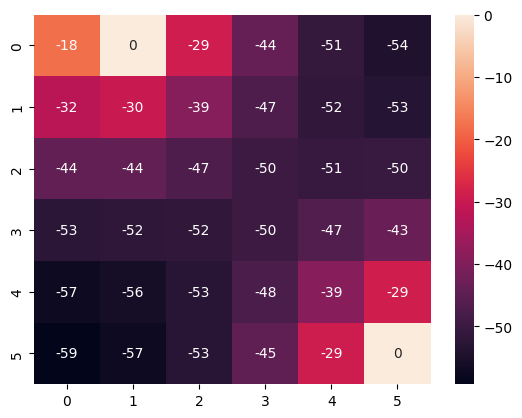

In [9]:
'''policy evaluation'''
#Policy Evaluation
delta = theta=1e-2
gamma = 1
value_function = np.zeros((height,width))*0.0
env = Gridworld(height,width,start_state,[(0,1),(5,5)])
while delta >= theta :
    #loop for each s in S
    new_value_function = np.zeros((height,width))*0.0
    for i in range(height):
        for j in range(width):
            for k in range(4):
                action = k
                new_value_function[i,j] += 0.25*(env.get_reward((i,j),action)+gamma*value_function[env.get_next_state((i,j),action)])
    delta = np.max(np.abs(new_value_function-value_function))
    value_function = new_value_function
print("true value function:")   
print(value_function)
ax = sns.heatmap(value_function.reshape(height,width),annot=True)